# Imports

In [4]:
from model_builder import ModelBuilder
import json
import warnings
warnings.filterwarnings("ignore")

In [5]:
with open("config.json", "rb") as json_file:
    config = json.load(json_file)
config

{'becker': {'filename': 'beckerestimation_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'mean_pre_discussion_error',
   'mean_post_discussion_error',
   'mean_pre_discussion_error_pct',
   'mean_post_discussion_error_pct',
   'question',
   'chatrooms',
   'trial_indx']},
 'csop': {'filename': 'csop_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'round_num',
   'round_index',
   'task_index',
   'complexity',
   'type',
   'social_perceptiveness',
   'skill',
   'normalized_score',
   'zscore_score',
   'zscore_round_duration',
   'zscore_efficiency']},
 'csopII': {'filename': 'csopII_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'vis_img',
   'int_verb',
   'ort_img',
   'rep_man',
   'soc_pers',
   'team_size',
   'difficulty',
   'score',
   'duration',
   'efficiency',
   'timestamp']},
 'dat': {'filename': 'DAT_output_conversation_level.csv',
  'cols_to_ignore':

# Per-Task Baseline Models
This notebook contains the _baseline models_ for each task. This allows us to get a quick understanding of the predictive features for each task (separately).

The lists of models are:

(1) Random Forests for each task:
- Jury
- CSOP Blended (across two datasets)
- CSOP Train -> CSOP II split
- DAT
- Estimation (Becker dataset)

(2) Early Cut-off Models (Train model only on the first X% of the messages, so that we avoid issues where the final stages of the discussion reveal the outcome)
- 50% (all datasets)
- 80% (all datasets)


# Jury

### Full Data (100)%

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.8645	MAE: 0.3195	MSE: 0.1359	RMSE: 0.3686
Validation Set:	R2: 0.1051	MAE: 0.7637	MSE: 0.8448	RMSE: 0.9191


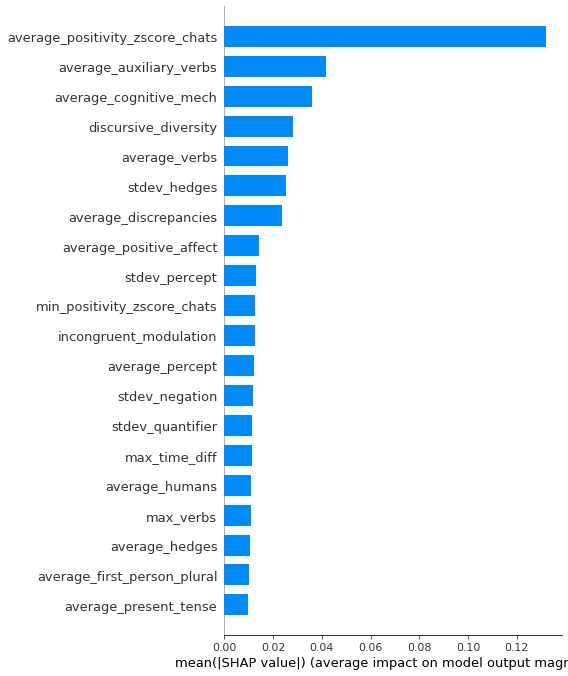

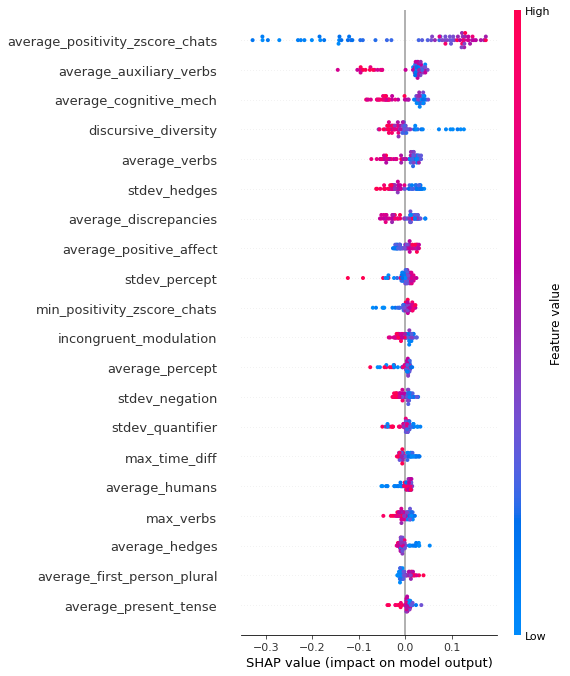

In [6]:
juries_model = ModelBuilder(dataset_names = ["juries"])
juries_model.select_target(target=["majority_pct"])
juries_model.define_model(model_type = 'rf')
juries_model.evaluate_model(juries_model.baseline_model, val_size = 0.2, test_size = None)

### 80% Data

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.8589	MAE: 0.3275	MSE: 0.1415	RMSE: 0.3762
Validation Set:	R2: 0.1754	MAE: 0.7275	MSE: 0.7785	RMSE: 0.8823


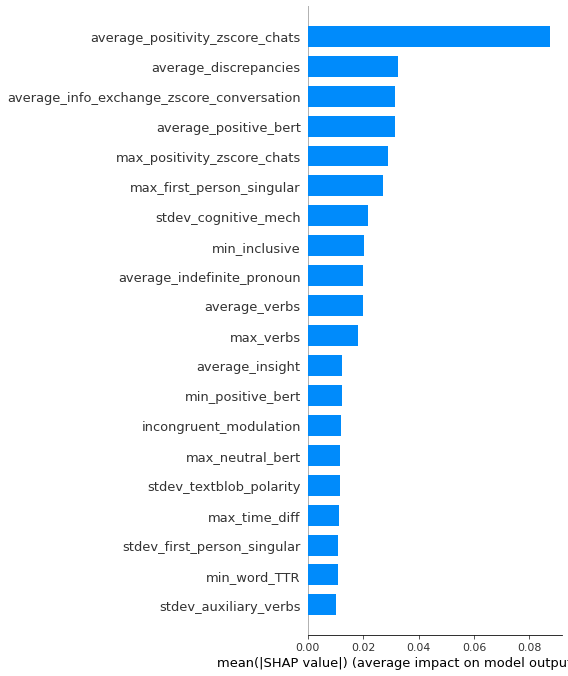

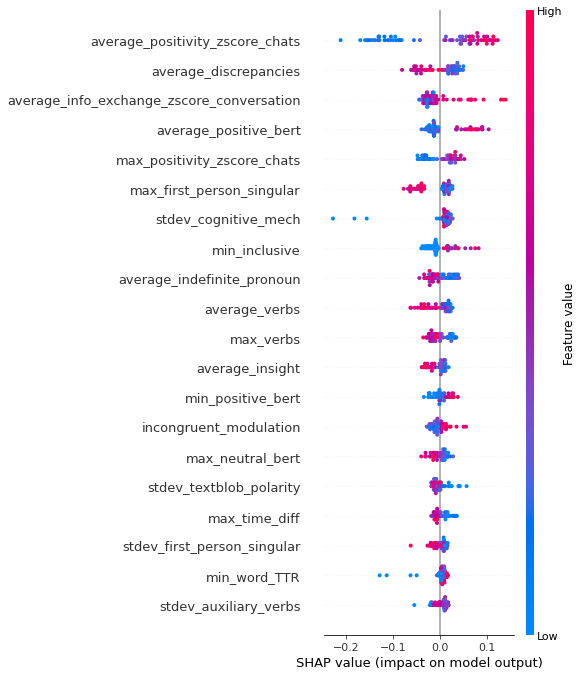

In [11]:
juries_model80 = ModelBuilder(dataset_names = ["juries"], output_dir = '../output/first_80/')
juries_model80.select_target(target=["majority_pct"])
juries_model80.define_model(model_type = 'rf')
juries_model80.evaluate_model(juries_model80.baseline_model, val_size = 0.2, test_size = None)

### 50% Data

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.8556	MAE: 0.3267	MSE: 0.1448	RMSE: 0.3805
Validation Set:	R2: -0.0109	MAE: 0.7903	MSE: 0.9544	RMSE: 0.9769


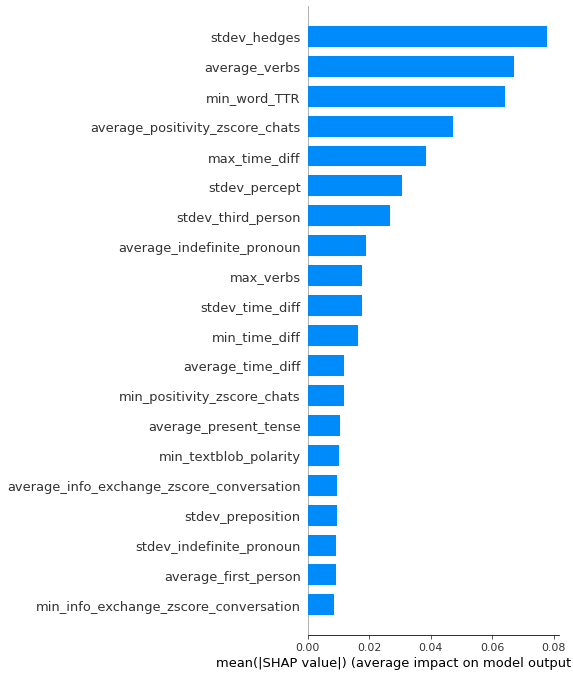

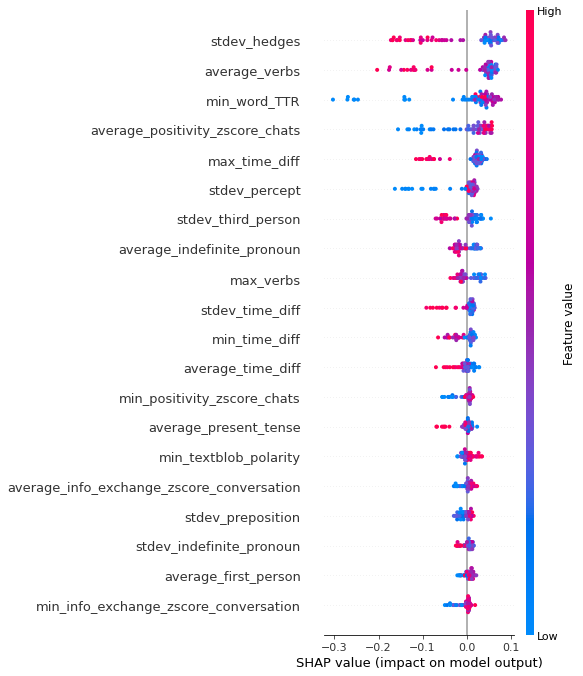

In [10]:
juries_model50 = ModelBuilder(dataset_names = ["juries"], output_dir = '../output/first_50/')
juries_model50.select_target(target=["majority_pct"])
juries_model50.define_model(model_type = 'rf')
juries_model50.evaluate_model(juries_model50.baseline_model, val_size = 0.2, test_size = None)

# CSOP (blended)

### Full Data (100%)

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3791	MAE: 0.5278	MSE: 0.6232	RMSE: 0.7894
Validation Set:	R2: 0.1871	MAE: 0.656	MSE: 0.7997	RMSE: 0.8943


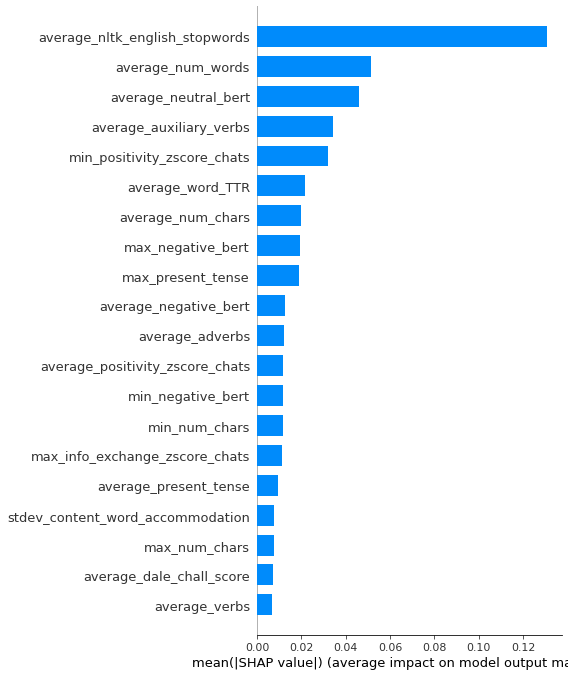

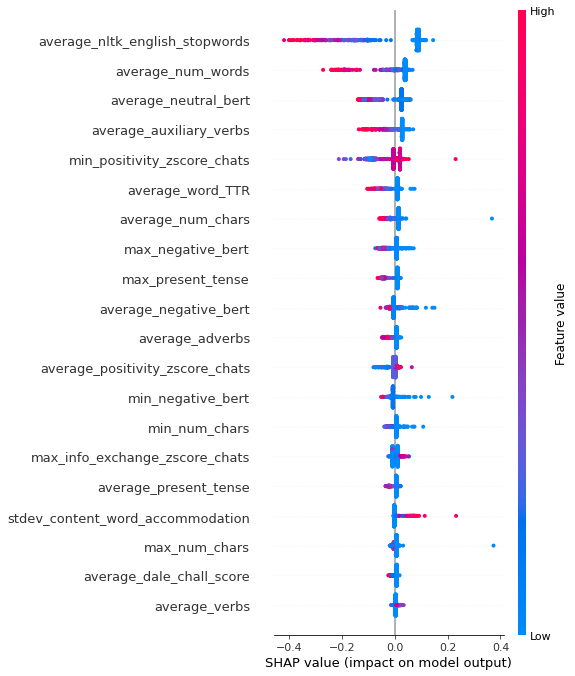

In [12]:
csop_blended_model = ModelBuilder(dataset_names = ["csop", "csopII"])
csop_blended_model.select_target(target=["zscore_efficiency", "efficiency"])
csop_blended_model.define_model(model_type = 'rf')
csop_blended_model.evaluate_model(csop_blended_model.baseline_model, val_size = 0.2, test_size = None)

### 80% Data

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3786	MAE: 0.5292	MSE: 0.6237	RMSE: 0.7897
Validation Set:	R2: 0.1869	MAE: 0.6557	MSE: 0.8	RMSE: 0.8944


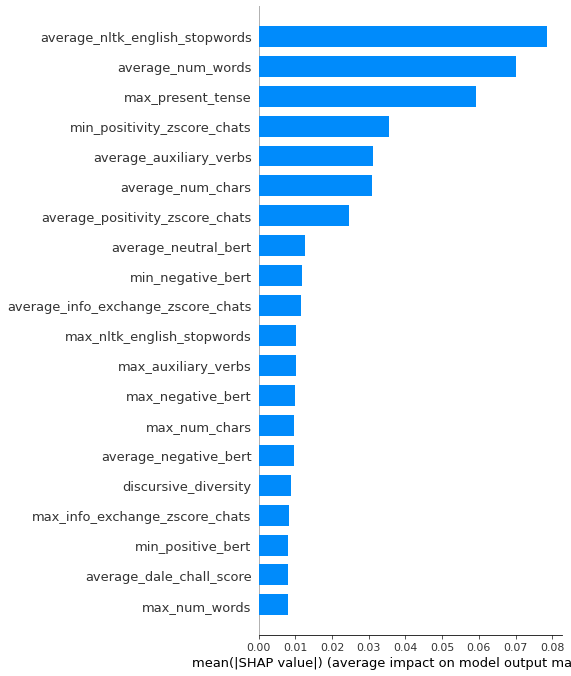

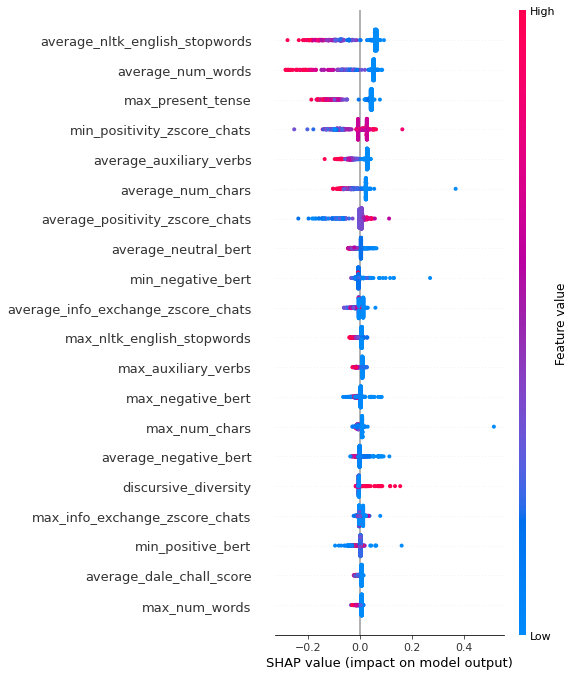

In [13]:
csop_blended_model80 = ModelBuilder(dataset_names = ["csop", "csopII"], output_dir = '../output/first_80/')
csop_blended_model80.select_target(target=["zscore_efficiency", "efficiency"])
csop_blended_model80.define_model(model_type = 'rf')
csop_blended_model80.evaluate_model(csop_blended_model80.baseline_model, val_size = 0.2, test_size = None)

### 50% Data

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3767	MAE: 0.5302	MSE: 0.6256	RMSE: 0.7909
Validation Set:	R2: 0.1994	MAE: 0.659	MSE: 0.7877	RMSE: 0.8875


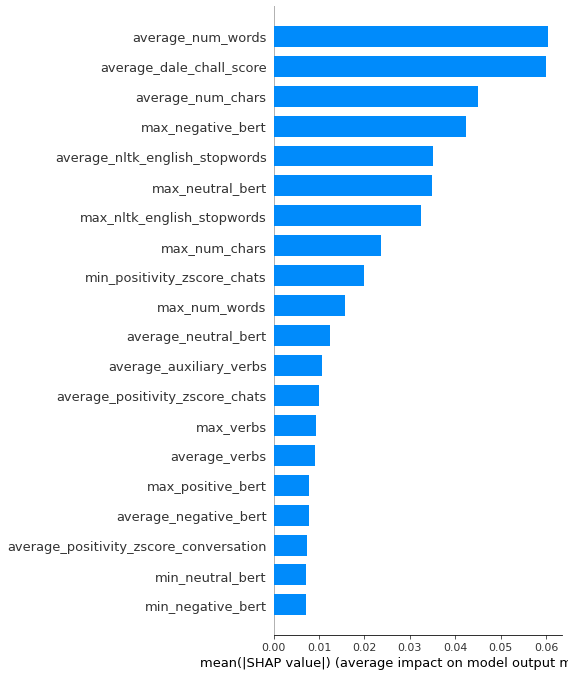

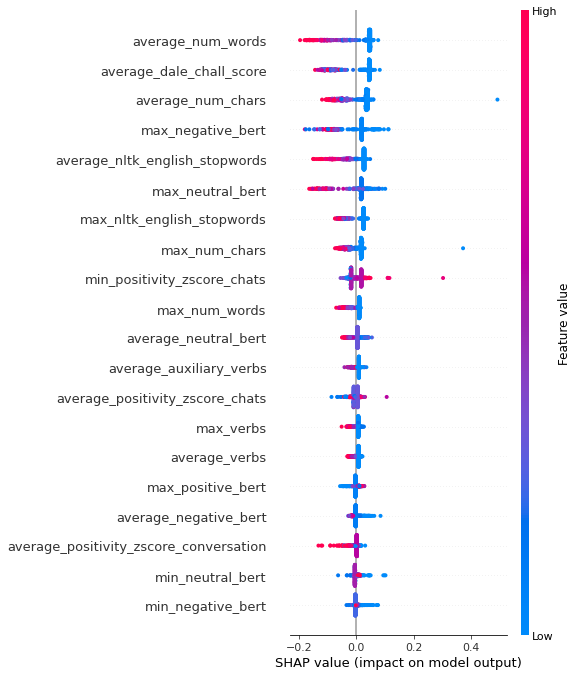

In [14]:
csop_blended_model50 = ModelBuilder(dataset_names = ["csop", "csopII"], output_dir = '../output/first_50/')
csop_blended_model50.select_target(target=["zscore_efficiency", "efficiency"])
csop_blended_model50.define_model(model_type = 'rf')
csop_blended_model50.evaluate_model(csop_blended_model50.baseline_model, val_size = 0.2, test_size = None)

# CSOP (Train on CSOP I -> Test on CSOP II)

### Full Data (100%)

Checking Holdout Sets...Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3927	MAE: 0.5232	MSE: 0.586	RMSE: 0.7655
Validation Set:	R2: 0.244	MAE: 0.7147	MSE: 0.986	RMSE: 0.993
Test Set:	R2: 0.1353	MAE: 0.7025	MSE: 0.8638	RMSE: 0.9294


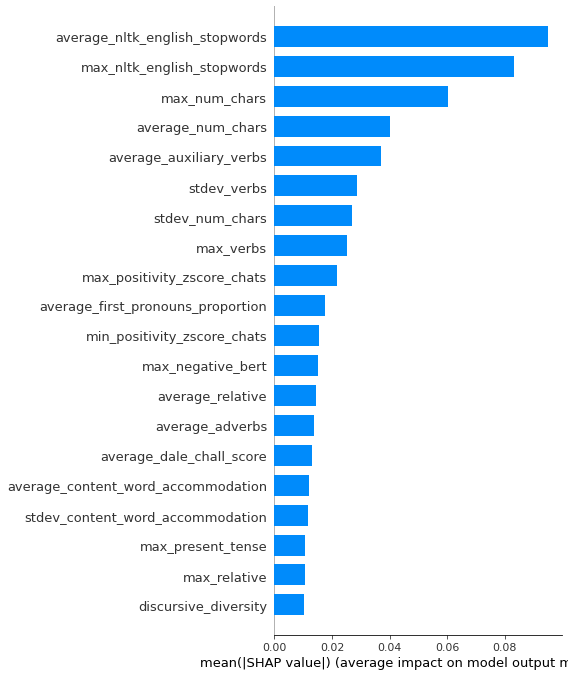

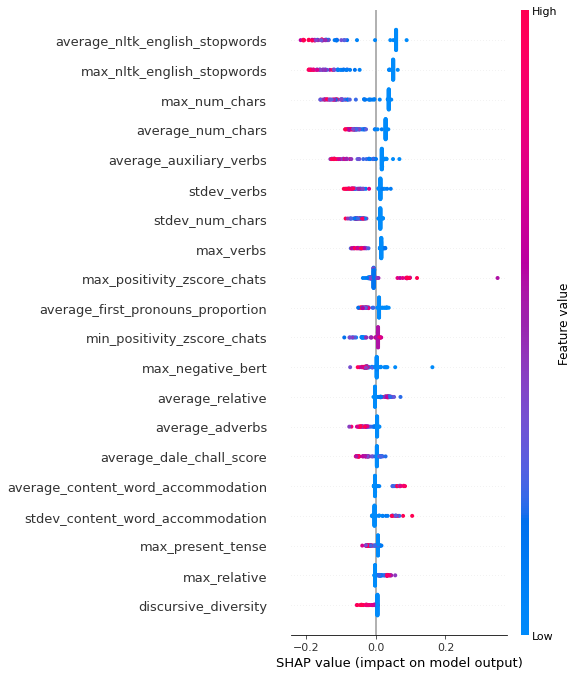

In [15]:
csop_model = ModelBuilder(dataset_names = ["csop"], test_dataset_names=["csopII"])
csop_model.select_target(target = "zscore_efficiency")
csop_model.select_test_target(target = "efficiency")
csop_model.define_model(model_type = 'rf')
csop_model.evaluate_model(csop_model.baseline_model)

### 80% Data

Checking Holdout Sets...Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3938	MAE: 0.5213	MSE: 0.5849	RMSE: 0.7648
Validation Set:	R2: 0.2291	MAE: 0.7363	MSE: 1.0054	RMSE: 1.0027
Test Set:	R2: 0.1354	MAE: 0.7017	MSE: 0.8637	RMSE: 0.9294


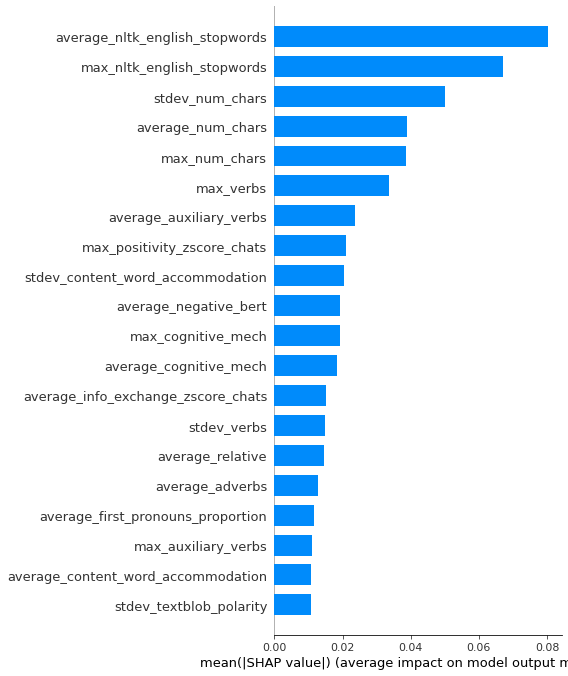

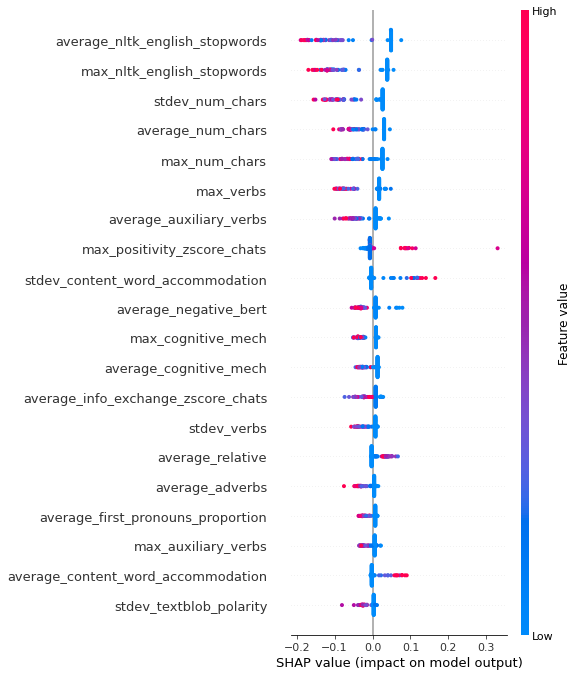

In [16]:
csop_model80 = ModelBuilder(dataset_names = ["csop"], test_dataset_names=["csopII"], output_dir = '../output/first_80/')
csop_model80.select_target(target = "zscore_efficiency")
csop_model80.select_test_target(target = "efficiency")
csop_model80.define_model(model_type = 'rf')
csop_model80.evaluate_model(csop_model80.baseline_model)

### 50% Data

Checking Holdout Sets...Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3879	MAE: 0.5288	MSE: 0.5906	RMSE: 0.7685
Validation Set:	R2: 0.235	MAE: 0.7271	MSE: 0.9977	RMSE: 0.9988
Test Set:	R2: 0.1201	MAE: 0.7044	MSE: 0.879	RMSE: 0.9375


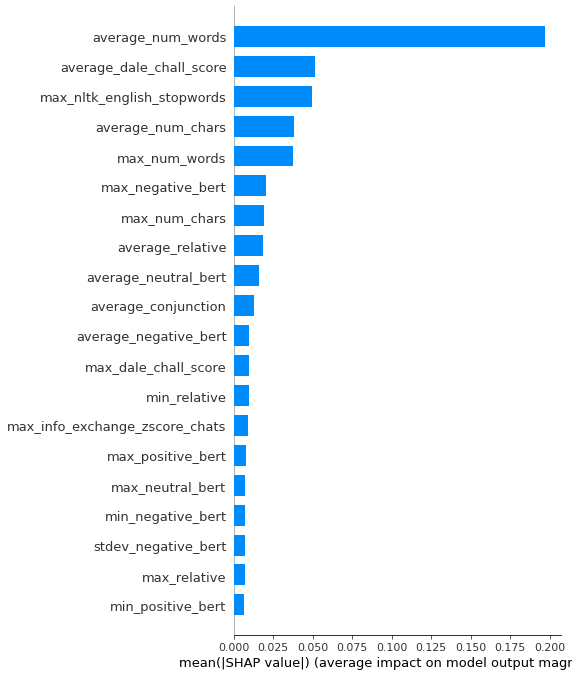

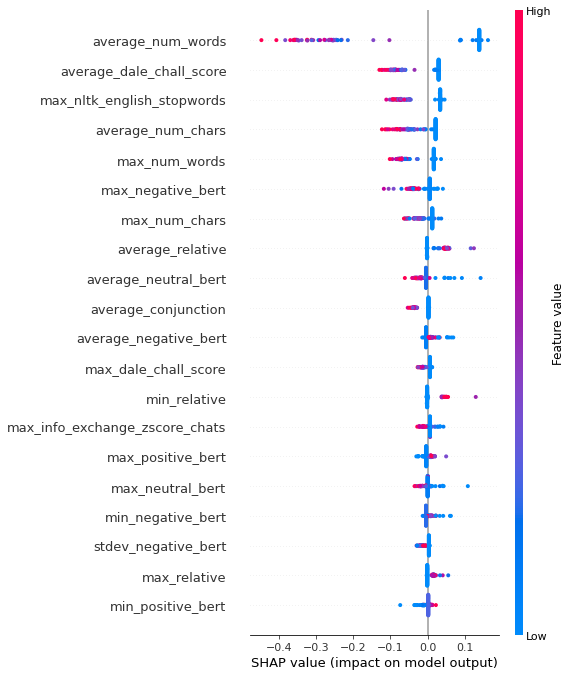

In [17]:
csop_model50 = ModelBuilder(dataset_names = ["csop"], test_dataset_names=["csopII"], output_dir = '../output/first_50/')
csop_model50.select_target(target = "zscore_efficiency")
csop_model50.select_test_target(target = "efficiency")
csop_model50.define_model(model_type = 'rf')
csop_model50.evaluate_model(csop_model50.baseline_model)

# DAT

### Full data (100%)

### 80% Data

### 50% Data

# Estimation

### Full Data (100%)

### 80% Data

### 50% Data